In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns

In [24]:
am1crop_emisioncrops_gfrac = pd.read_excel("D:/kerja/asisten riset/code v/step 3/GbGlct/AM1_prop_emission_crops_GFRAC_afterELKE_run3a.xlsx")
ccode_image = pd.read_excel("D:/kerja/asisten riset/vol/milkunC/achaidir/LUH2 2022/ISO-3166-Country-Code_Final.xlsx")
df1 = pd.read_excel("D:/kerja/asisten riset/code v/step 3/GbGlct/AM1_prop_emission_crops_GFRAC_chart1.xlsx")
df3 = pd.read_excel("D:/kerja/asisten riset/code v/step 3/GbGlct/luc_agri_prop_crop_AM1_v3.xlsx")

am1crop_emisioncrops_gfrac['country_name'] = am1crop_emisioncrops_gfrac['country_name'].replace("United Kingdom of Great Britain and Northern Irela", "United Kingdom of Great Britain and Northern Ireland")
df3['country_name'] = df3['country_name'].replace("United Kingdom of Great Britain and Northern Irela", "United Kingdom of Great Britain and Northern Ireland")

am1crop_emisioncrops_gfrac = am1crop_emisioncrops_gfrac.rename(columns=lambda x: x.capitalize())
am1crop_emisioncrops_gfrac = am1crop_emisioncrops_gfrac.rename(columns={'Grass': 'grass'})

In [6]:
am1crop_emisioncrops = pd.merge(left=am1crop_emisioncrops_gfrac, right=ccode_image, left_on='Country_name', right_on='ISO Country')
am1crop_emisioncrops.head()

,Country_name,Time,grass,Maize,Oil & palm fruit,Other non-food & luxury & spices,Other temperate cereals,Plant based fibres,Pulses,Rice,...,Wheat,ISO Country,alpha-2,alpha-3,country-code,iso_3166-2,Sub Region,ISO Region,IMAGE Region Code,IMAGE Region Name
0,Afghanistan,1975,0.201359,0.278457,0.0,0.509319,0.597166,0.480496,0.061246,0.013612,...,0.758319,Afghanistan,AF,AFG,4,ISO 3166-2:AF,South Asia,Asia,RSAS,Rest S. Asia
1,Afghanistan,1980,0.137474,0.277454,0.0,0.545206,0.557067,0.628728,0.069215,0.017261,...,4.678715,Afghanistan,AF,AFG,4,ISO 3166-2:AF,South Asia,Asia,RSAS,Rest S. Asia
2,Afghanistan,1985,0.197743,0.298191,0.0,0.879608,0.483314,0.509377,0.074926,0.020031,...,0.584433,Afghanistan,AF,AFG,4,ISO 3166-2:AF,South Asia,Asia,RSAS,Rest S. Asia
3,Afghanistan,1990,0.135803,0.268741,0.0,0.977646,0.489957,0.458077,0.080152,0.021219,...,0.224466,Afghanistan,AF,AFG,4,ISO 3166-2:AF,South Asia,Asia,RSAS,Rest S. Asia
4,Afghanistan,1995,0.148289,0.174165,0.0,0.237568,0.550831,0.475144,0.090353,0.018100,...,0.241770,Afghanistan,AF,AFG,4,ISO 3166-2:AF,South Asia,Asia,RSAS,Rest S. Asia


In [25]:
df3_merge = pd.merge(left=df3, right=ccode_image, left_on='country_name', right_on='ISO Country')
df3_merge.head()

,country_name,type,1975,1980,1985,1990,1995,2000,2005,2010,...,2020,ISO Country,alpha-2,alpha-3,country-code,iso_3166-2,Sub Region,ISO Region,IMAGE Region Code,IMAGE Region Name
0,Afghanistan,grass,0.000186,0.000364,0.0,0.0,0.0,0.0,0.0,0.0,...,1.704972e-05,Afghanistan,AF,AFG,4,ISO 3166-2:AF,South Asia,Asia,RSAS,Rest S. Asia
1,Afghanistan,maize,0.000030,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,Afghanistan,AF,AFG,4,ISO 3166-2:AF,South Asia,Asia,RSAS,Rest S. Asia
2,Afghanistan,oil & palm fruit,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,Afghanistan,AF,AFG,4,ISO 3166-2:AF,South Asia,Asia,RSAS,Rest S. Asia
3,Afghanistan,other non-food & luxury & spices,0.005571,0.001914,0.0,0.0,0.0,0.0,0.0,0.0,...,5.489770e-07,Afghanistan,AF,AFG,4,ISO 3166-2:AF,South Asia,Asia,RSAS,Rest S. Asia
4,Afghanistan,other temperate cereals,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,Afghanistan,AF,AFG,4,ISO 3166-2:AF,South Asia,Asia,RSAS,Rest S. Asia


In [26]:
df3_IMAGE_region = df3_merge[['type',                1975,
                      1980,                1985,                1990,
                      1995,                2000,                2005,
                      2010,                2015,                2020, 'IMAGE Region Name']]
df3_groupby = df3_IMAGE_region.groupby(['type', 'IMAGE Region Name']).sum()
df3 = df3_groupby.reset_index()
df3.head()

,type,IMAGE Region Name,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
0,grass,Brazil,4.888251,3.511598,2.542020,2.511059,1.627110,1.737953,3.078110,1.314513,2.057332,1.614012
1,grass,C. Europe,0.000394,0.000000,0.000000,0.000042,0.000018,0.000000,0.000000,0.000000,0.000000,0.000000
2,grass,Canada,0.000267,0.000000,0.000386,0.001507,0.018340,0.000000,0.000000,0.000000,0.000000,0.000032
3,grass,China,1.141637,2.407284,2.533792,2.869168,2.224510,1.760093,0.000000,0.000000,0.137725,0.001145
4,grass,E. Africa,0.258078,0.009596,0.876226,1.057065,0.617345,1.337517,0.642743,0.003561,0.008891,0.294730


In [28]:
# df3['IMAGE Realtion'] = df3['IMAGE Region Name'] + " - " + df3['type']
df3 = df3[[             1975,
                      1980,                1985,                1990,
                      1995,                2000,                2005,
                      2010,                2015,                2020,
          'IMAGE Realtion']]
df3

,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,IMAGE Realtion
0,4.888251,3.511598,2.542020,2.511059,1.627110,1.737953,3.078110,1.314513,2.057332,1.614012,Brazil - grass
1,0.000394,0.000000,0.000000,0.000042,0.000018,0.000000,0.000000,0.000000,0.000000,0.000000,C. Europe - grass
2,0.000267,0.000000,0.000386,0.001507,0.018340,0.000000,0.000000,0.000000,0.000000,0.000032,Canada - grass
3,1.141637,2.407284,2.533792,2.869168,2.224510,1.760093,0.000000,0.000000,0.137725,0.001145,China - grass
4,0.258078,0.009596,0.876226,1.057065,0.617345,1.337517,0.642743,0.003561,0.008891,0.294730,E. Africa - grass
...,...,...,...,...,...,...,...,...,...,...,...
437,0.000000,0.000000,0.000000,0.000217,0.002235,0.000000,0.000000,0.000000,0.000000,0.000101,Turkey - wheat
438,0.000000,0.000000,0.008018,0.000000,0.000090,0.000000,0.000000,0.000000,0.000000,0.001242,USA - wheat
439,0.000000,0.000289,0.000000,0.024998,0.116625,0.000000,0.000000,0.000000,0.000000,0.000000,Ukraine region - wheat
440,0.000000,0.000000,0.010856,0.000000,0.000000,0.007715,0.000340,0.003411,0.000009,0.003078,W. Africa - wheat


In [35]:
df3_melt = df3.melt(id_vars=['IMAGE Realtion'], var_name='Time', value_name='value')

results = {}

df3_sort = df3_melt.sort_values(by=['value'], ascending=[True])

# Loop untuk melakukan filter pada setiap tahun
for time in df3_sort['Time'].unique():
    filtered_data = df3_sort[df3_sort['Time'] == time]
    sorted_data = filtered_data.sort_values(by='value', ascending=False)
    top_5_data = sorted_data.head(5)
    if time not in results:
        results[time] = {}
    results[time] = top_5_data

In [69]:
df3_concat = pd.concat([pd.concat(results.values())])
df3_concat.head()

,IMAGE Realtion,Time,value
1771,China - grass,1995,2.224510
1768,Brazil - grass,1995,1.627110
1794,Brazil - maize,1995,1.176752
1792,W. Africa - grass,1995,1.013853
1976,Brazil - soybeans,1995,1.008245


In [71]:
am1crop_IMAGE_region = am1crop_emisioncrops[['Time', 'grass', 'Maize', 'Oil & palm fruit',
       'Other non-food & luxury & spices', 'Other temperate cereals',
       'Plant based fibres', 'Pulses', 'Rice', 'Soybeans', 'Sugar crops',
       'Temperate oil crops', 'Temperate roots & tubers', 'Tropical cereals',
       'Tropical oil crops', 'Tropical roots & tubers', 'Vegetables & fruits',
       'Wheat','IMAGE Region Name']]

In [ ]:
# df3_pivot = am1crop_IMAGE_region.pivot_table(index='IMAGE Region Name', columns='Time', values=columns, aggfunc="sum")

In [111]:
# am1_IMAGE_region_melt = am1crop_IMAGE_region.melt(id_vars=['Time','IMAGE Region Name'], var_name='type', value_name='value')
# df3 = am1_IMAGE_region_melt.groupby(['IMAGE Region Name', 'Time']).sum()
# df3 = df3.reset_index()
# df3 = df3.drop(columns='type')
# df3.head()

In [73]:
columns = am1crop_IMAGE_region.columns[1:-1].to_list()
df_pivot = am1crop_IMAGE_region.pivot_table(index='IMAGE Region Name', columns='Time', values=columns, aggfunc="sum")
df_index = df_pivot.stack(level=0, future_stack=True)
df_index = df_index.reset_index()
df2_index = df_index.rename(columns={"level_1": "type"})
df2_columns = df2_index[['IMAGE Region Name',                        1975,
                      1980,                1985,                1990,
                      1995,                2000,                2005,
                      2010,                2015,                2020]]
df2_groupby = df2_columns.groupby(['IMAGE Region Name']).sum()
df2 = df2_groupby.reset_index()
df2.head()

Time,IMAGE Region Name,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
0,Brazil,156.898543,173.501580,141.637250,1209.743006,1183.187354,1126.643923,1206.326969,646.803432,927.446851,919.539832
1,C. Europe,30.441317,24.866850,23.408754,21.374395,20.205226,19.201129,19.873054,11.691620,9.660487,10.283797
2,Canada,17.390600,14.394159,13.120351,22.784937,22.719792,27.670830,25.863956,25.030020,26.008468,28.902750
3,China,53.372795,53.735014,1107.030796,1984.906416,1432.943241,1070.961850,477.334404,219.459518,275.974966,274.405808
4,E. Africa,38.341304,44.105189,44.200070,44.691870,141.858413,210.740050,229.444137,317.706680,262.451089,285.471124


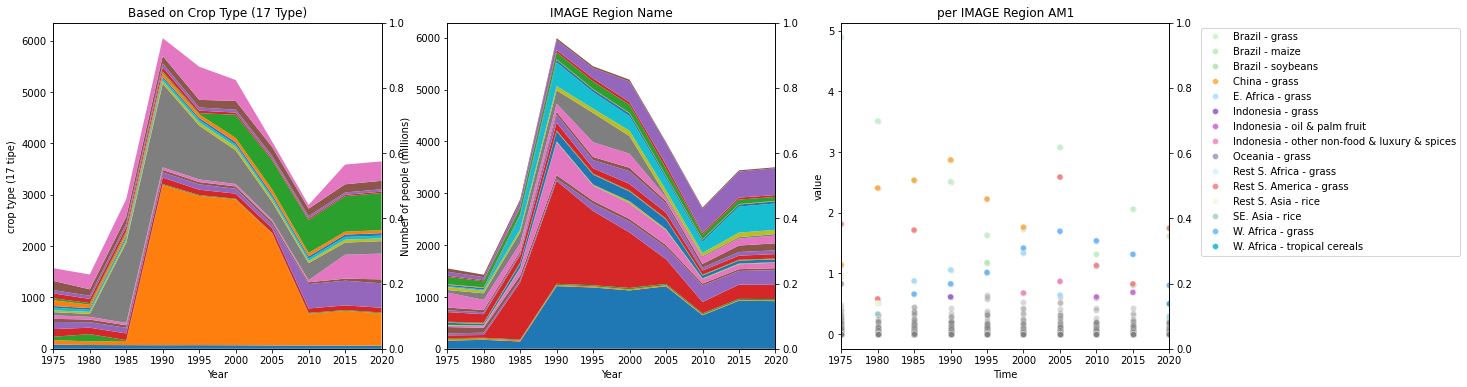

In [142]:

tahun = np.array([list(range(1975, 2025, 5))])
label = df1['type'].to_list()

plt.figure(figsize=(20, 6))
loc = plticker.MultipleLocator(base=5.0)

ax = plt.subplot(131)
ax.stackplot(tahun[0], df1[tahun[0]].values, labels=df1['type'].values)

# ax.legend(loc='upper left')
ax.set_title('Based on Crop Type (17 Type)')
ax.set_xlabel('Year')
ax.set_ylabel('crop type (17 tipe)')
ax.twinx()

ax.xaxis.set_major_locator(loc)
ax.set_xlim(tahun[0][0], tahun[0][-1])

ax1 = plt.subplot(132)
ax1.stackplot(tahun[0], df2[tahun[0]].values,
             labels=df2["IMAGE Region Name"].values) 

# ax1.legend(loc='upper left')
ax1.set_title('IMAGE Region Name')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of people (millions)')
ax1.twinx()
ax1.xaxis.set_major_locator(loc)
ax1.set_xlim(tahun[0][0], tahun[0][-1])

ax2 = plt.subplot(133)
ax2.set_title("per IMAGE Region AM1")

sns.scatterplot(x="Time", y="value", color='grey',
                sizes=(100, 300), alpha=.3, data=df3_melt)

palette = {'China - grass': "#FFA62F",
 'Brazil - grass': "#BFF6C3",
  'Brazil - maize':"#B0EBB4",
       'W. Africa - grass' : "#5AB2FF",
        'Brazil - soybeans': "#ACE1AF",
         'Rest S. America - grass' : "#FA7070",
          'Indonesia - other non-food & luxury & spices' : "#F27BBD",
       'E. Africa - grass' : "#A0DEFF",
        'Rest S. Africa - grass' : "#CAF4FF",
        'Indonesia - oil & palm fruit' : "#C65BCF",
         'Indonesia - grass' : "#874CCC",
         'W. Africa - tropical cereals' : "#03AED2",
          'Rest S. Asia - rice' : "#F1FADA",
           'SE. Asia - rice' : "#9AD0C2",
            'Oceania - grass': "#9290C3"}

sns.scatterplot(x="Time", y="value", hue='IMAGE Realtion',
            sizes=(100, 400), alpha=.8, palette=palette, data=df3_concat.sort_values(by=['IMAGE Realtion'], ascending=[True]))

ax2.legend(bbox_to_anchor=(1.08, 1), ncol=1, loc='upper left')
ax2.twinx()
ax2.xaxis.set_major_locator(loc)
ax2.set_xlim(tahun[0][0], tahun[0][-1])

plt.show()